In [2]:
import tensorflow as tf
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

2022-01-05 18:25:03.516420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-05 18:25:03.516458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
class_names = ['Roboto-Regular',
 'FredokaOne-Regular',
 'PTSerif-Regular',
 'Dancing+Script-Regular',
 'Oswald-Regular',
 'PatuaOne-Regular',
 'Arimo-Regular',
 'NotoSans-Regular',
 'Open+Sans-Regular',
 'Ubuntu-Regular']

In [4]:
model = tf.keras.models.load_model('Models/FinalModel.h5')

2022-01-05 18:37:11.514811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pranav/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-01-05 18:37:11.514950: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-05 18:37:11.515042: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pranav-pc): /proc/driver/nvidia/version does not exist
2022-01-05 18:37:11.517140: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-05 18:37:11.619989:

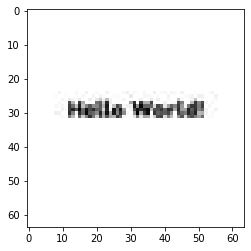

In [5]:
img = cv2.imread('sample.jpg')
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

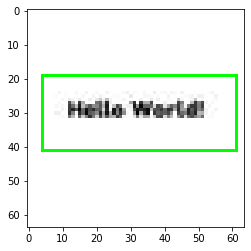

In [7]:
im2 = img.copy()
text_boxes = []
text_boxes_xy = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 1)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
    text_boxes.append(cropped)
    text_boxes_xy.append((x,y,w,h))
    # Open the file in append mode
    #file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    #text = pytesseract.image_to_string(cropped)
plt.imshow(im2)

In [8]:
prediction = np.zeros((len(text_boxes),1))
output = {"detectedFonts":[]}
for i in range(len(text_boxes)):
  pred_x = cv2.cvtColor(text_boxes[i],cv2.COLOR_RGB2GRAY)
  pred_x = cv2.resize(pred_x,(64,64))[np.newaxis,:,:]
  prediction = model.predict(np.array(pred_x))
  logits = tf.nn.softmax(prediction)
  max_index = np.argmax(logits)
  output['detectedFonts'].append({'boundingBox':text_boxes_xy[i],"font":class_names[max_index],"confidence":np.max(logits)})


In [9]:
print(output)

{'detectedFonts': [{'boundingBox': (4, 19, 57, 22), 'font': 'FredokaOne-Regular', 'confidence': 1.0}]}
